In [1]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")
df = pd.read_csv(f"{path}/cardio_train.csv", sep=';')

df = df.drop(columns=["id"], errors="ignore")

print(df.head())

df_limpo = df[
    (df["age"] >= 10000) & (df["age"] <= 30000) &
    (df["height"] >= 120) & (df["height"] <= 220) &
    (df["weight"] >= 30) & (df["weight"] <= 200) &
    (df["ap_hi"] >= 90) & (df["ap_hi"] <= 250) &
    (df["ap_lo"] >= 60) & (df["ap_lo"] <= 150)
].copy()

df_limpo["age_years"] = (df_limpo["age"] / 365.25).astype(int)

X = df_limpo.drop(columns=["cardio"])
y = df_limpo["cardio"]

provavel_categoricas = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]

features_all = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

features_bin = [col for col in features_all if col in provavel_categoricas]
features_cont = [col for col in features_all if col not in provavel_categoricas]

C:\Users\super\Documents\GitHub\PI5-LivingIA\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


---

### Descrição das Variáveis

**Variáveis contínuas:**
`age_years`, `height`, `weight`, `ap_hi`, `ap_lo`

**Variáveis binárias/categóricas:**
`gender`, `cholesterol`, `gluc`, `smoke`, `alco`, `active`, `cardio`

---

**Detalhamento das variáveis:**

- `age_years` → Idade em anos (convertida de `age` em dias)
- `height` → Altura em centímetros
- `weight` → Peso em quilogramas
- `ap_hi` → Pressão arterial sistólica (máxima)
- `ap_lo` → Pressão arterial diastólica (mínima)

- `gender` → Sexo: 1 = homem, 2 = mulher
- `cholesterol` → Nível de colesterol: 1 = normal, 2 = alto, 3 = muito alto
- `gluc` → Nível de glicose: 1 = normal, 2 = alto, 3 = muito alto
- `smoke` → Fumante: 0 = não, 1 = sim
- `alco` → Consome álcool: 0 = não, 1 = sim
- `active` → Fisicamente ativo: 0 = não, 1 = sim

- `cardio` → Presença de doença cardiovascular: 0 = não, 1 = sim

### Achei interessante KNN nessa base para testar o comportamento desse algoritmo em classes categoricas

---

=== Bloco de Análise Exploratória ===


=== 1. Histogramas das variáveis contínuas por classe ===


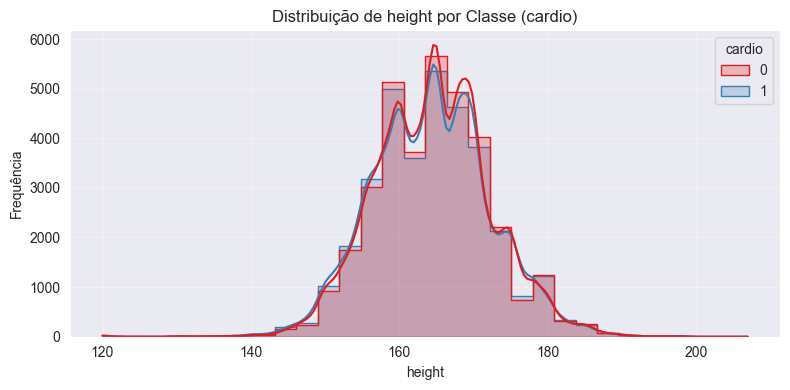

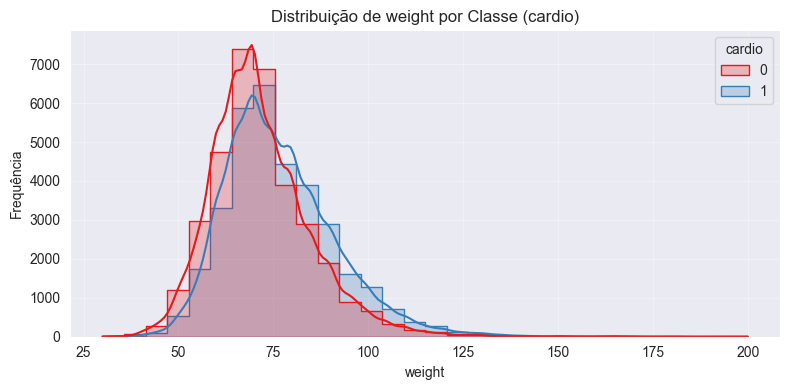

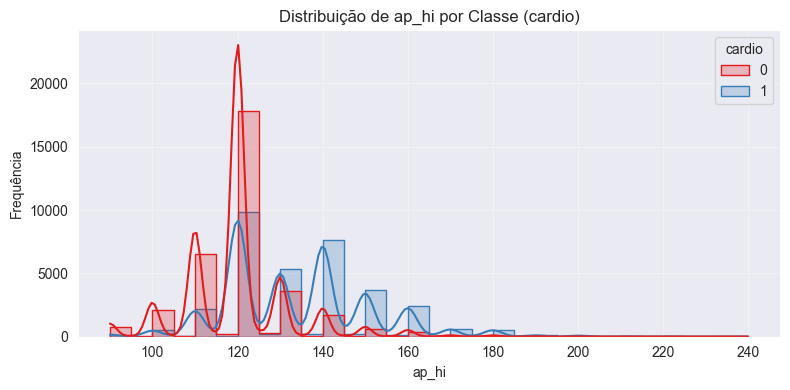

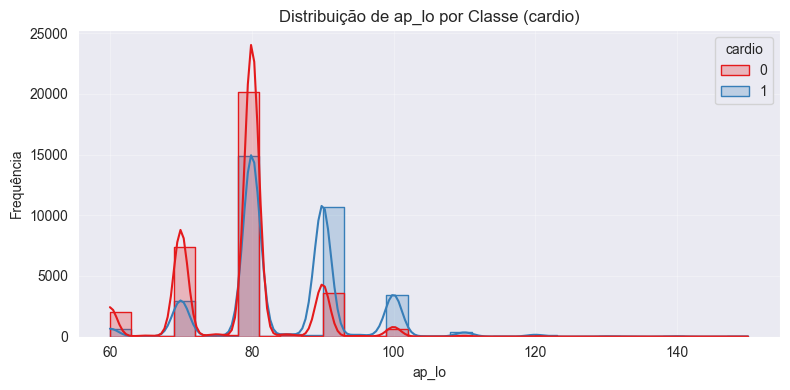

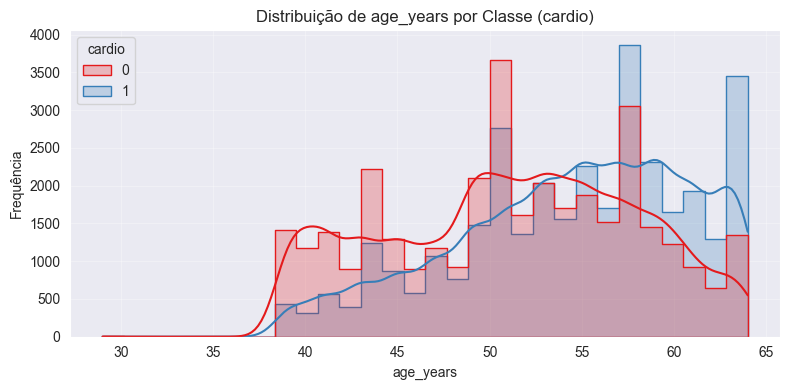


=== 2. Distribuição de Faixa Etária por Classe ===


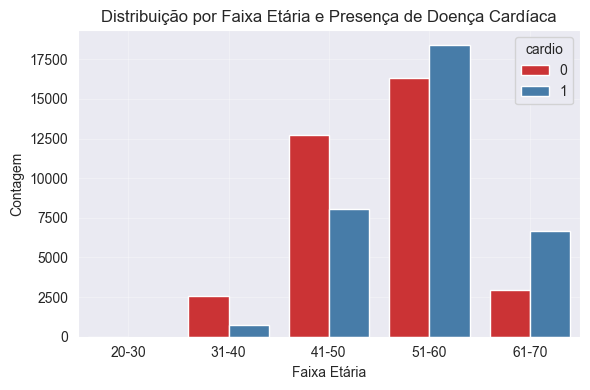


=== 3. Nível de Atividade Física por Classe ===


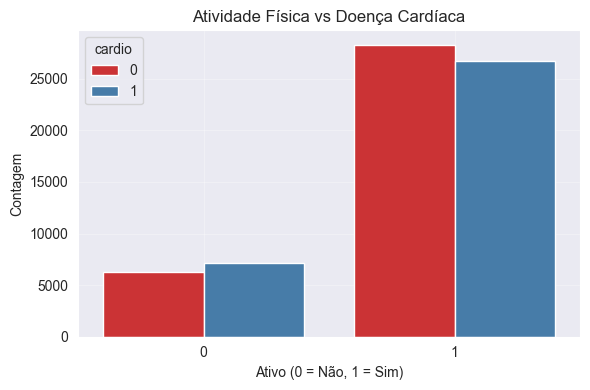


=== 4. Fumante por Classe ===


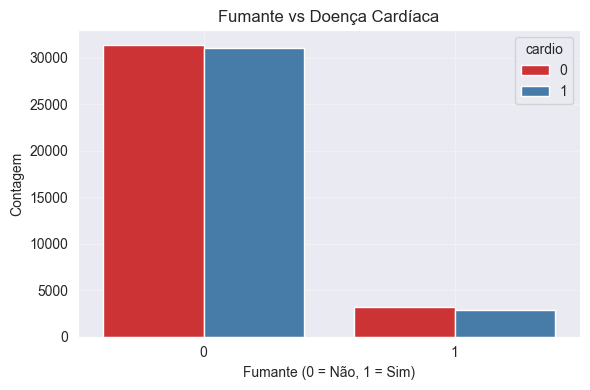


=== 5. Dispersão entre variáveis contínuas (pairplot) ===


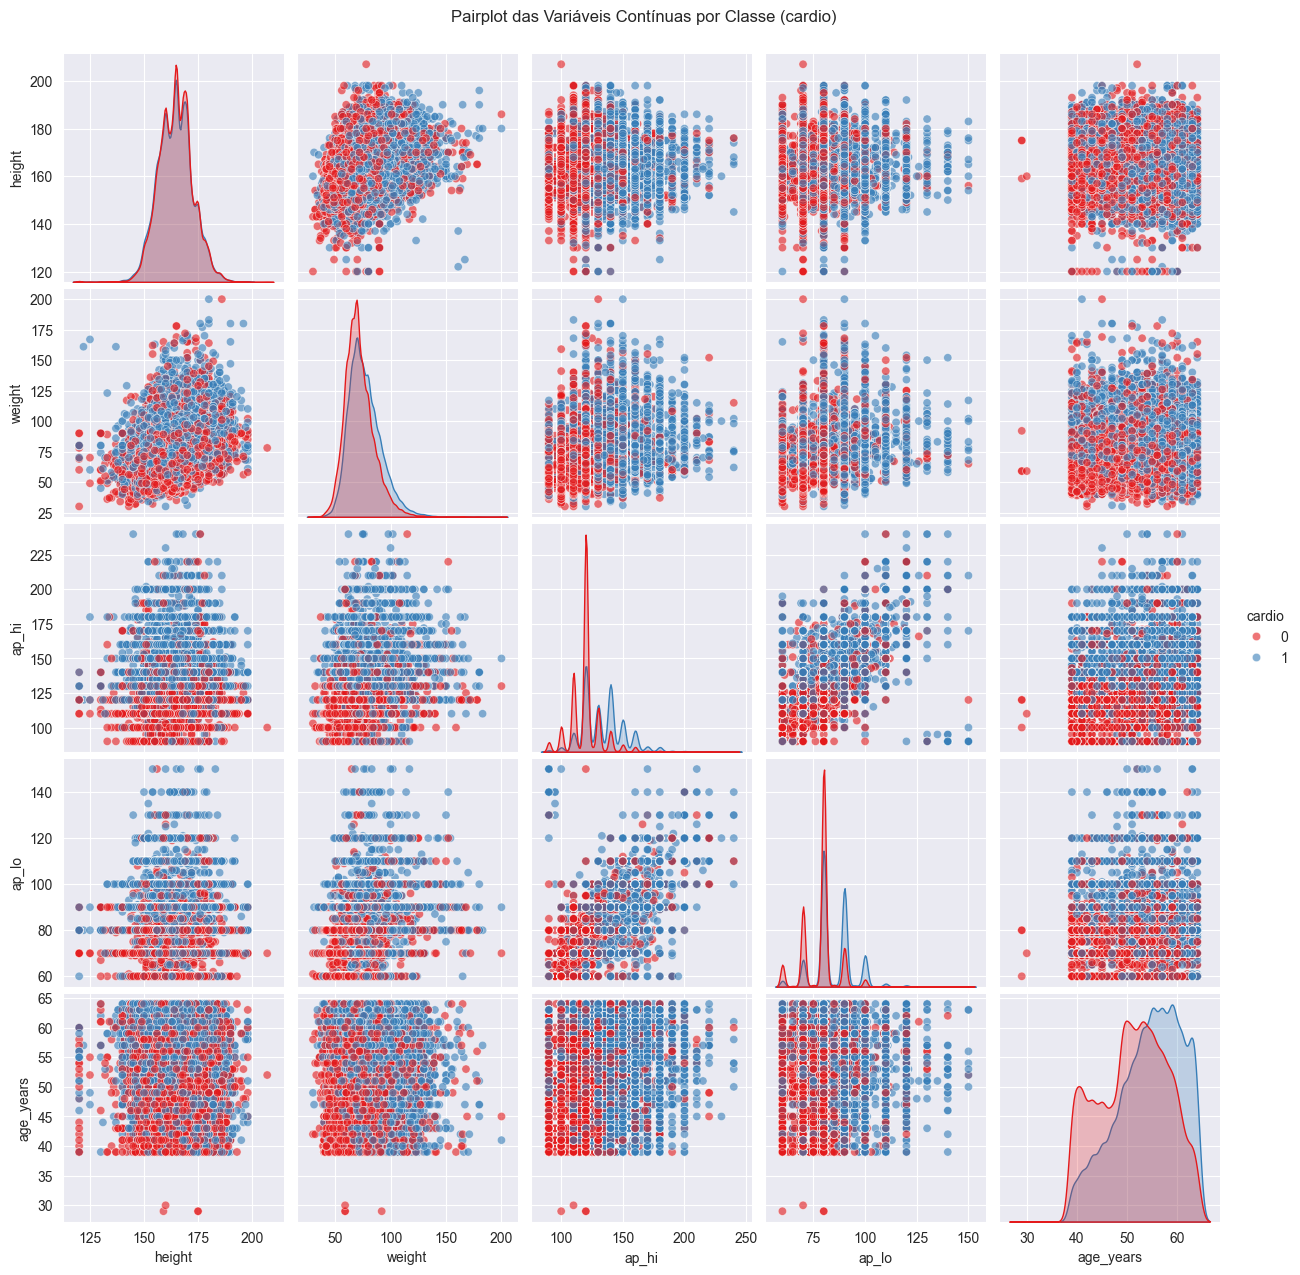


=== 6. PCA com Variáveis CONTÍNUAS (normalizadas) ===


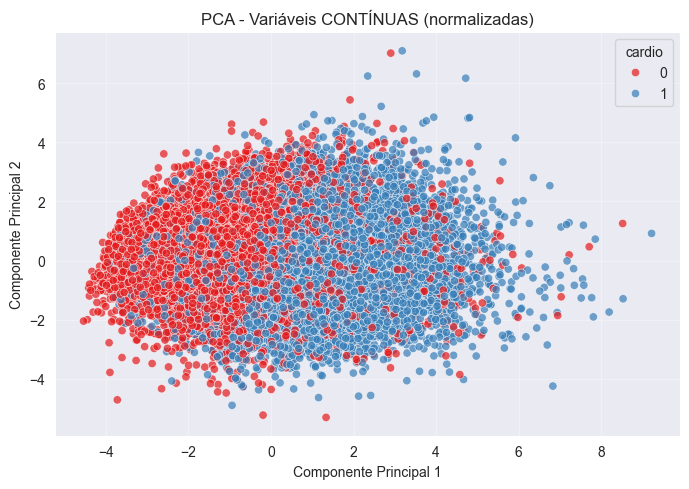


=== 7. PCA com Variáveis CONTÍNUAS (normalizadas) + BINÁRIAS/CATEGÓRICAS ===


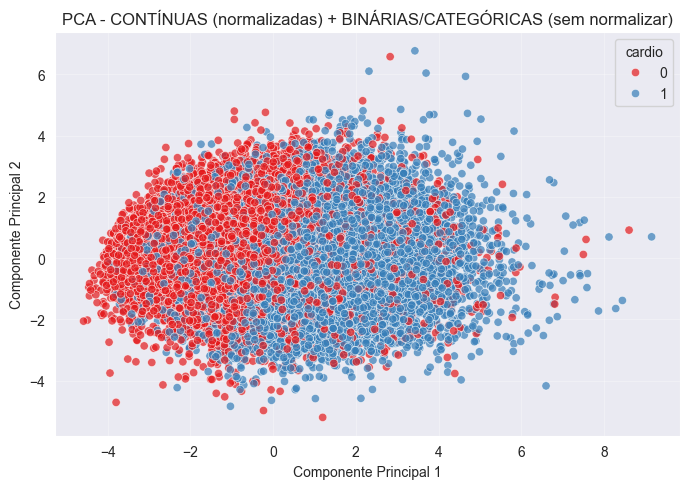

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("=== Bloco de Análise Exploratória ===\n")

features_cont = [col for col in features_cont if col != "age"]

print("\n=== 1. Histogramas das variáveis contínuas por classe ===")
for feature in features_cont:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_limpo, x=feature, hue='cardio', kde=True, bins=30, palette='Set1', element='step')
    plt.title(f'Distribuição de {feature} por Classe (cardio)')
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n=== 2. Distribuição de Faixa Etária por Classe ===")
df_limpo["faixa_etaria"] = pd.cut(
    df_limpo["age_years"],
    bins=[20, 30, 40, 50, 60, 70],
    labels=["20-30", "31-40", "41-50", "51-60", "61-70"]
)

plt.figure(figsize=(6, 4))
sns.countplot(data=df_limpo, x='faixa_etaria', hue='cardio', palette='Set1')
plt.title('Distribuição por Faixa Etária e Presença de Doença Cardíaca')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== 3. Nível de Atividade Física por Classe ===")
plt.figure(figsize=(6, 4))
sns.countplot(data=df_limpo, x='active', hue='cardio', palette='Set1')
plt.title('Atividade Física vs Doença Cardíaca')
plt.xlabel('Ativo (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== 4. Fumante por Classe ===")
plt.figure(figsize=(6, 4))
sns.countplot(data=df_limpo, x='smoke', hue='cardio', palette='Set1')
plt.title('Fumante vs Doença Cardíaca')
plt.xlabel('Fumante (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== 5. Dispersão entre variáveis contínuas (pairplot) ===")
sns.pairplot(
    data=df_limpo,
    vars=features_cont,
    hue='cardio',
    palette='Set1',
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle("Pairplot das Variáveis Contínuas por Classe (cardio)", y=1.02)
plt.show()

print("\n=== 6. PCA com Variáveis CONTÍNUAS (normalizadas) ===")
scaler_cont = StandardScaler()
X_cont_scaled = scaler_cont.fit_transform(df_limpo[features_cont])

pca_cont = PCA(n_components=2)
X_pca_cont = pca_cont.fit_transform(X_cont_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca_cont[:, 0], y=X_pca_cont[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title("PCA - Variáveis CONTÍNUAS (normalizadas)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== 7. PCA com Variáveis CONTÍNUAS (normalizadas) + BINÁRIAS/CATEGÓRICAS ===")

scaler_cont = StandardScaler()
X_cont_scaled = scaler_cont.fit_transform(df_limpo[features_cont])
X_cont_df = pd.DataFrame(X_cont_scaled, columns=features_cont, index=df_limpo.index)

X_combined = pd.concat([X_cont_df, df_limpo[features_bin].astype(float)], axis=1)

pca_combined = PCA(n_components=2)
X_pca_combined = pca_combined.fit_transform(X_combined)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca_combined[:, 0], y=X_pca_combined[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title("PCA - CONTÍNUAS (normalizadas) + BINÁRIAS/CATEGÓRICAS (sem normalizar)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

## 2. Análise Exploratória dos Dados

### 2.1 Histogramas das Variáveis Contínuas por Classe (`cardio`)
Este gráfico mostra a distribuição das variáveis contínuas (`age_years`, `height`, `weight`, `ap_hi`, `ap_lo`) separadas por classe (`cardio = 0` ou `1`).
É útil para verificar se existem diferenças significativas entre os grupos saudáveis e os com doença cardiovascular.
Por exemplo, podemos identificar se pacientes com doença têm, em média, pressão arterial mais alta ou peso diferente.

#### Destaque para os graficos - ap_hi vs cardio, ap_lo vs cardio

---

### 2.2 Gráficos de Contagem (Countplot) das Variáveis Categóricas
Apresenta as variáveis categóricas (`cholesterol`, `alco`, `gluc`) separadas por classe `cardio`.
Esses gráficos são importantes para verificar a frequência de cada categoria e sua relação com a doença.
Exemplo: uma quantidade maior de pessoas com `cholesterol = 3` pode estar associada com maior incidência de doença cardiovascular.

---

### 2.3 Pairplot entre Variáveis Contínuas
O Pairplot mostra a dispersão entre cada par de variáveis contínuas e a densidade de cada uma delas.
É útil para:
- Identificar padrões, correlações ou clusters naturais entre variáveis
- Ver se há separação visual entre as classes

- **Diagonal =** mostra a **distribuição (histograma ou curva de densidade)** de cada variável individualmente, separada por classe (no nosso caso, presença ou ausência de doença cardiovascular).
  - Exemplo: no gráfico de `height x height`, vemos que as distribuições de altura são praticamente iguais entre as classes, indicando que altura sozinha não é um bom preditor para a doença.

- **Fora da diagonal (linha/coluna) =** mostra os **gráficos de dispersão ("scatter plot")** entre pares de variáveis, também coloridos por classe.
  - É possível observar se existe alguma separação entre as classes olhando a distribuição das cores nesses gráficos.
  - Por exemplo, ao analisar `ap_hi x ap_lo` ou `ap_hi x weight`, podemos notar padrões ou agrupamentos diferentes entre pacientes doentes e saudáveis.

#### Destaque para os gráficos
- O gráfico **height x height** indica que altura **não é um bom preditor** para doença cardiovascular, pois as distribuições das classes são quase idênticas.
- Já os gráficos como **ap_hi x ap_lo** e **ap_hi x weight** tendem a mostrar maior diferença entre as classes, sendo **melhores preditores** para o risco de doença cardiovascular.

- Ja sabemos que parametro distance - 'uniform' sera pior por conta da sobreposicao toda das classes

---

### 2.4 PCA com Variáveis CONTÍNUAS (normalizadas)
Aqui aplicamos **Análise de Componentes Principais (PCA)** apenas nas variáveis contínuas normalizadas.
O objetivo é reduzir a dimensionalidade e projetar os dados em um espaço 2D que concentre a maior variância possível.
É útil para:
- Ver visualmente se há separação entre as classes ao analisar o todo

---

### 2.5 PCA com CONTÍNUAS + CATEGÓRICAS
Neste gráfico, unimos as variáveis contínuas (normalizadas) com as categóricas binárias (sem normalizar) e aplicamos novamente PCA.
**Mesmo assim, o gráfico gerado ficou muito semelhante ao anterior. Por quê?**

**Explicação**:
Por que às vezes o PCA com contínuas + categóricas binárias parece igual ao só com contínuas? E em outros casos muda muito?

1.
- No caso do seu dataset cardio (saúde):
As variáveis categóricas binárias (ex: smoke, alco) são poucas, geralmente valem 0 ou 1, e sua variância é muito menor do que as contínuas (mesmo após normalização).
- O PCA prioriza as direções com maior variância.
- Se as binárias são poucas ou pouco informativas (não diferenciam muito as classes), a maior parte da variabilidade vai continuar sendo explicada pelas variáveis contínuas.

#### Resultado: o gráfico PCA fica quase igual, porque o PCA "ignora" as binárias por terem pouca contribuição na explicação da variância total.

2.
- No caso de datasets como o de cobertura florestal (com muitas variáveis binárias):
Aqui, você pode ter dezenas de variáveis binárias (ex: tipo de solo, área selvagem, etc).
- Mesmo que cada uma tenha pouca variância, juntas elas podem representar uma parcela significativa da informação do dataset!
- Além disso, se as classes estão muito associadas a combinações dessas variáveis binárias, a projeção do PCA pode mudar bastante ao incluí-las.
- Em datasets onde as classes são muito determinadas por variáveis binárias (ou categóricas bem informativas), o PCA ao incluir essas variáveis vai capturar novas direções de separação, mudando bastante o gráfico.

#### Resultado: o gráfico PCA fica muito diferente, porque o PCA "considera" mais as binárias por terem mais contribuição na variância total / impactam mais as classes

---

### Nao aplicamos PCA no treino do algoritmo pois nao sao tantos atributos assim

---

=== Histogramas Antes e Depois da Normalização ===


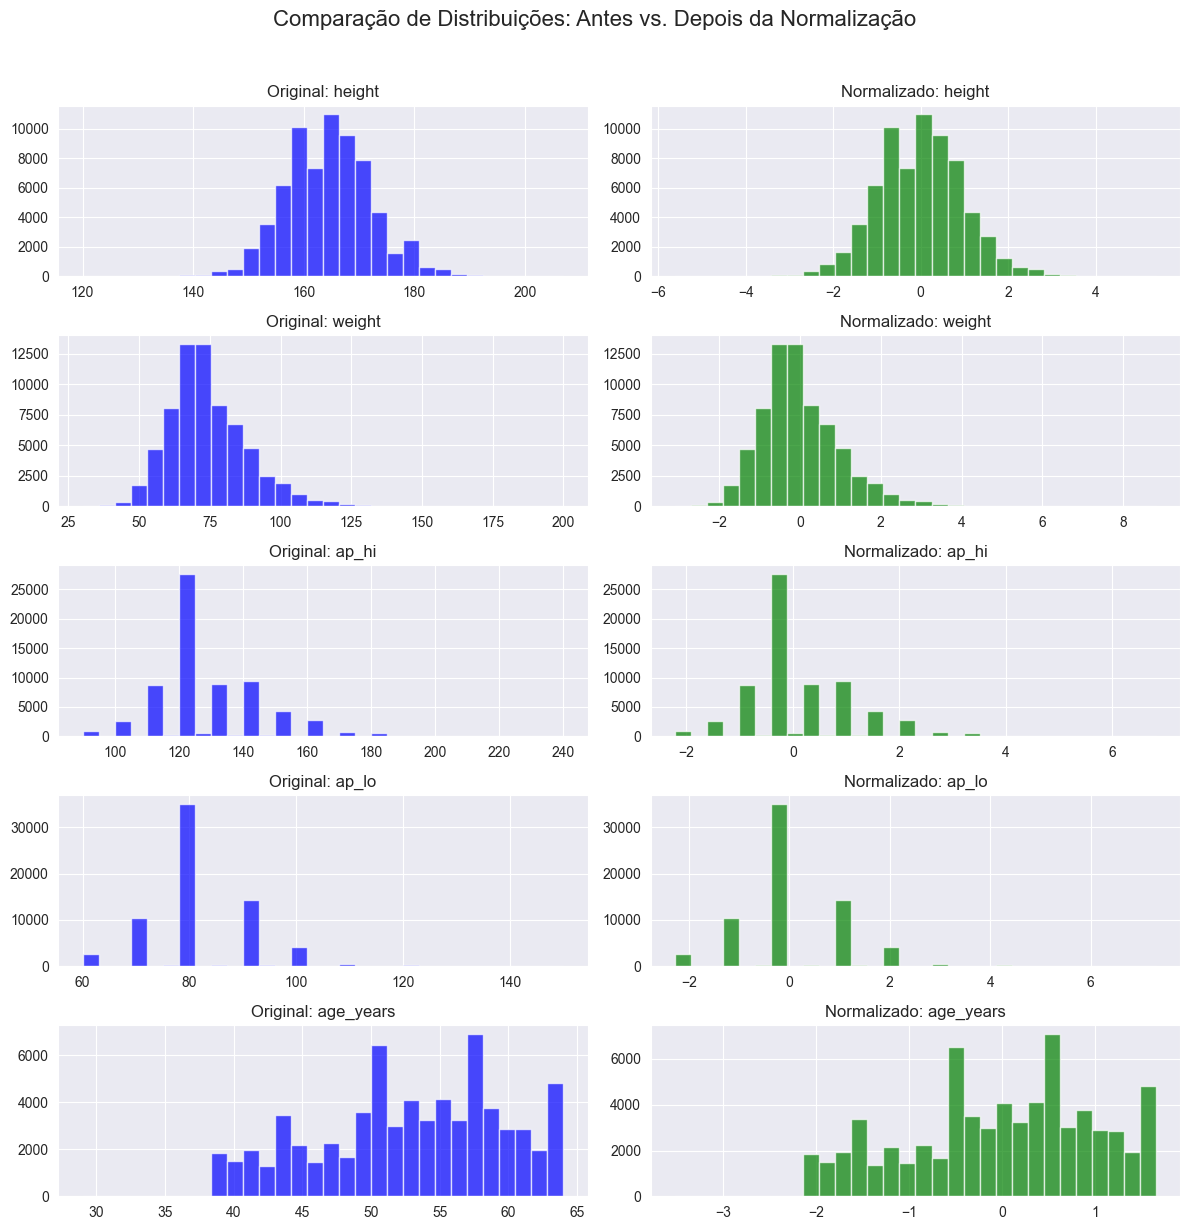

In [3]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalização com StandardScaler
scaler = StandardScaler()
X_scaled = df_limpo.copy()
X_scaled[features_cont] = scaler.fit_transform(X_scaled[features_cont])

print("=== Histogramas Antes e Depois da Normalização ===")

# Plot comparativo
fig, axes = plt.subplots(len(features_cont), 2, figsize=(12, len(features_cont)*2.5))
fig.suptitle('Comparação de Distribuições: Antes vs. Depois da Normalização', fontsize=16)

for i, feature in enumerate(features_cont):
    axes[i, 0].hist(df_limpo[feature], bins=30, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Original: {feature}')

    axes[i, 1].hist(X_scaled[feature], bins=30, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Normalizado: {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Comparação de Distribuições: Antes vs. Depois da Normalização

Este conjunto de gráficos compara a distribuição das **variáveis contínuas** antes e depois da **normalização com `StandardScaler`**.

### O que está sendo feito?

- **À esquerda**: distribuição original de cada variável (`age_years`, `height`, `weight`, `ap_hi`, `ap_lo`, etc.).
- **À direita**: distribuição após aplicar `StandardScaler`, que transforma os dados para terem:
  - Média = 0
  - Desvio padrão = 1

### Por que isso é importante?

- **Algoritmos como MLP nao existe a necessidade de usar StandardScaler, entretanto ajuda na convergência ( otimiza o processo de treinamento, permitindo que o gradiente descendente converja mais rapidamente. Isso ocorre porque os pesos são ajustados de forma mais eficiente quando os dados estão em uma escala uniforme. )

### Interpretação visual

- As formas das distribuições permanecem as mesmas (normalização não muda a forma), mas os eixos são centralizados em 0 e padronizados.
- Isso confirma que a transformação foi aplicada corretamente sem distorcer a estrutura dos dados.

---

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

# 1. Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.20, stratify=y, random_state=42)

# 2. Modelo-base
mlp_base = MLPClassifier(
    solver='adam',
    early_stopping=True,
    validation_fraction=0.10,
    random_state=42,
    verbose=False
)

# 3. Grid de hiperparâmetros
param_grid = {
    "hidden_layer_sizes": [(20,), (50,), (100,), (20,20), (50, 50), (100, 100)],
    "activation": ["relu", "tanh", "logistic"],
    "learning_rate_init": [0.001, 0.01, 0.1],
    "max_iter": [500, 750, 1000],
}

# 4. GridSearchCV
grid = GridSearchCV(
    estimator=mlp_base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=2
)

# 5. Treinamento
grid.fit(X_train, y_train)

# 6. Avaliação e melhores parâmetros
print("\nMelhores Hiperparâmetros encontrados pelo GridSearchCV:")
best_params = grid.best_params_
for param, valor in best_params.items():
    print(f"• {param}: {valor}")

print(f"\nMelhor acurácia média durante a validação cruzada: {grid.best_score_:.4f}")

# 7. Interpretação
print("\nInterpretação dos parâmetros escolhidos:")
if 'hidden_layer_sizes' in best_params:
    print(f"• hidden_layer_sizes = {best_params['hidden_layer_sizes']} → Define a estrutura da rede. "
          f"Camadas como {best_params['hidden_layer_sizes']} indicam capacidade de capturar padrões mais complexos.")

if 'activation' in best_params:
    ativ = best_params['activation']
    print(f"• activation = '{ativ}' → "
          + ("'relu': Rápido e eficaz para não-linearidades." if ativ == "relu" else
             "'tanh': Bom para dados centrados em 0." if ativ == "tanh" else
             "'logistic': Simples e tradicional."))

if 'learning_rate_init' in best_params:
    lr = best_params['learning_rate_init']
    print(f"• learning_rate_init = {lr} → Controla a velocidade de aprendizagem. Valor intermediário como {lr} busca estabilidade.")

if 'max_iter' in best_params:
    print(f"• max_iter = {best_params['max_iter']} → Número máximo de épocas. Com early stopping, ajuda a evitar overfitting.")

# 8. Top 5 melhores combinações
print("\nTop 5 combinações de hiperparâmetros por acurácia média:")
resultados = pd.DataFrame(grid.cv_results_)
top5 = resultados[['mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False).head(5)

for idx, row in enumerate(top5.itertuples(), start=1):
    print(f"\n#{idx} - Acurácia média: {row.mean_test_score:.4f}")
    for key, val in row.params.items():
        print(f"   → {key}: {val}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Melhores Hiperparâmetros encontrados pelo GridSearchCV:
• activation: logistic
• hidden_layer_sizes: (50, 50)
• learning_rate_init: 0.01
• max_iter: 500

Melhor acurácia média durante a validação cruzada: 0.7345

Interpretação dos parâmetros escolhidos:
• hidden_layer_sizes = (50, 50) → Define a estrutura da rede. Camadas como (50, 50) indicam capacidade de capturar padrões mais complexos.
• activation = 'logistic' → 'logistic': Simples e tradicional.
• learning_rate_init = 0.01 → Controla a velocidade de aprendizagem. Valor intermediário como 0.01 busca estabilidade.
• max_iter = 500 → Número máximo de épocas. Com early stopping, ajuda a evitar overfitting.

Top 5 combinações de hiperparâmetros por acurácia média:

#1 - Acurácia média: 0.7345
   → activation: logistic
   → hidden_layer_sizes: (50, 50)
   → learning_rate_init: 0.01
   → max_iter: 750

#2 - Acurácia média: 0.7345
   → activation: logistic
   → hidden_layer_

---

## Otimização do MLPClassifier com GridSearchCV

### 1. Uso do GridSearchCV

Assim como no KNN, utilizamos o `GridSearchCV` para encontrar a **melhor combinação de hiperparâmetros** para o nosso modelo de rede neural MLP (Multi-Layer Perceptron). O `GridSearchCV` testa todas as combinações possíveis dos hiperparâmetros definidos, aplicando validação cruzada (`cv=5`) (5 pois esta minimamente balanceado ) para avaliar o desempenho de cada configuração de forma robusta e evitar overfitting.
O modelo com a melhor média de acurácia é selecionado como o final.

### 2. Hiperparâmetros testados e suas justificativas

- **hidden_layer_sizes**
  - Valores: `(20,)`, `(50,)`, `(100,)`, `(20,20)`, `(50,50)`, `(100,100)`
  - *Justificativa:* Testar diferentes arquiteturas (mais simples e mais complexas), com uma ou duas camadas ocultas, para avaliar a capacidade de aprendizado e evitar tanto underfitting quanto overfitting.

#### Um bom preditivo quanto numero de neuronios seria o dobro da quantidade totals de atributos de um data set

- **activation**
  - Valores: `'relu'`, `'tanh'`, `'logistic'`
  - *Justificativa:*
    - `'relu'`: A função mais popular atualmente, rápida e eficaz. Retorna 0 para valores de entrada menores ou iguais a 0 e retorna o próprio valor da entrada para valores maiores que 0
    - `'tanh'`: Útil quando os dados são centrados em zero, pode melhorar a convergência em alguns casos. Para entradas negativas, o valor de saída é negativo; para entradas positivas, é positivo.
    - `'logistic'`: A tradicional sigmoide, mais indicada para problemas lineares ou pouco complexos ( Binarios / Categoricos ) - Para entradas negativas, se aproxima de 0; para entradas positivas, se aproxima de 1.

- **learning_rate_init**
  - Valores: `0.001`, `0.01`, `0.1`
  - *Justificativa:* Controla o quão rápido o modelo aprende. Testar diferentes valores permite achar um equilíbrio entre convergência rápida e estabilidade durante o treinamento.

  - O learning rate (taxa de aprendizado) define o tamanho dos passos que o otimizador dá ao ajustar os pesos da rede neural durante o treinamento.
  - Valores pequenos: os ajustes nos pesos são sutis; o treinamento é mais lento, mas pode ser mais estável.
  - Valores grandes: os ajustes são rápidos; pode acelerar o treinamento, mas aumenta o risco de "pular" o ótimo global e nunca convergir, ou mesmo deixar o treinamento instável (oscilando sem parar).
  - O ideal é equilibrar velocidade e estabilidade, por isso é comum testar diferentes valores.

- **max_iter / Epoch**
  - Valores: `500`, `750`, `1000`
  - *Justificativa:* Define o número máximo de épocas de treinamento. Um valor maior pode ser necessário para redes mais profundas ou com funções de ativação mais "lentas" (como tanh ou logistic), mas queremos evitar execuções muito longas desnecessariamente.

### Outros parâmetros usados e explicados:

- **solver**
  - Valor: `'adam'`
  - *Justificativa:* Otimizador moderno, robusto e eficiente para bases de dados médias e grandes. Automatiza o ajuste de taxa de aprendizado e funciona bem na maioria dos casos. (Outras opções seriam `'lbfgs'` e `'sgd'`.)

  - O solver é o algoritmo utilizado para otimizar os pesos da rede neural.
  - Cada solver tem vantagens e características distintas:

  **adam (padrão e recomendado para maioria dos casos):**
  - Um otimizador moderno, combina as ideias do RMSprop e do Momentum, ajustando automaticamente a learning rate para cada parâmetro.
  - É robusto, funciona bem para datasets grandes, e raramente precisa de muitos ajustes.

  **sgd (Stochastic Gradient Descent):**
  - Atualiza os pesos usando exemplos aleatórios do dataset. Pode ser eficiente, mas é mais sensível à escolha da learning rate e outros parâmetros.
  - Permite customizações como momentum e nesterov.

  **lbfgs:**
    Um otimizador de segunda ordem (quasi-Newton), que pode ser mais rápido e preciso para datasets pequenos, mas não escala bem para grandes volumes de dados.

- **early_stopping=True**
  - Ativa a parada antecipada: o treinamento é interrompido automaticamente se não houver melhoria na validação por várias épocas, prevenindo overfitting e economizando tempo computacional.

#### Relação entre learning rate, solver, backpropagation e gradiente descendente

1. **Relação entre learning rate e solver**
    - **Learning rate (`learning_rate_init`)** é um parâmetro que controla o **tamanho do ajuste dos pesos** a cada passo durante o treinamento.
      **Exemplo:**
        Se o learning rate for 0.1:
            - O ajuste real será 0.1 × 2 = +0.2. -> Demora mais pra aprender
        Se o learning rate for 1:
            - O ajuste real será 1 × 2 = +2. -> Demora menos

    - **Solver** é o algoritmo responsável por realizar esses ajustes — ele **usa** o learning rate para determinar **como** atualizar os pesos.
    - **O learning rate é um ingrediente do solver:** você escolhe o valor do learning rate, e o solver usa esse valor na fórmula de atualização dos pesos.

2. **Relação entre solver, backpropagation e gradiente descendente**
    - **Backpropagation** **calcula o gradiente do erro em relação a cada peso da rede**, propagando o erro "de trás para frente". Comeca da saida e vai retrocedendo ate primeiros neuronios.
    - O **solver** então aplica o **gradiente descendente** (ou uma de suas variações) usando o gradiente calculado pelo backpropagation, para atualizar os pesos.

    - **Backpropagation** calcula **como os pesos devem ser ajustados** (direção do gradiente - descendente). -> **CALCULA**
    - **Solver** aplica o ajuste (dando passos na direção do gradiente), usando o **learning rate** para definir o tamanho desses passos. -> **USA**

---

### 3. Resultados da busca

- O `GridSearchCV` retorna a combinação de hiperparâmetros com a **maior acurácia média** durante a validação cruzada.
- O relatório também apresenta as **top 5 melhores combinações** testadas, permitindo avaliar a robustez e sensibilidade do modelo a diferentes configurações.

---


Avaliação Final - MLP (Melhor Modelo do GridSearch)

Classification Report (conjunto de teste):
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6911
           1       0.75      0.69      0.72      6783

    accuracy                           0.73     13694
   macro avg       0.73      0.73      0.73     13694
weighted avg       0.73      0.73      0.73     13694


Matriz de Confusão:
[[5373 1538]
 [2132 4651]]

Métricas Globais:
• Acurácia : 0.7320
• F1-Score : 0.7313


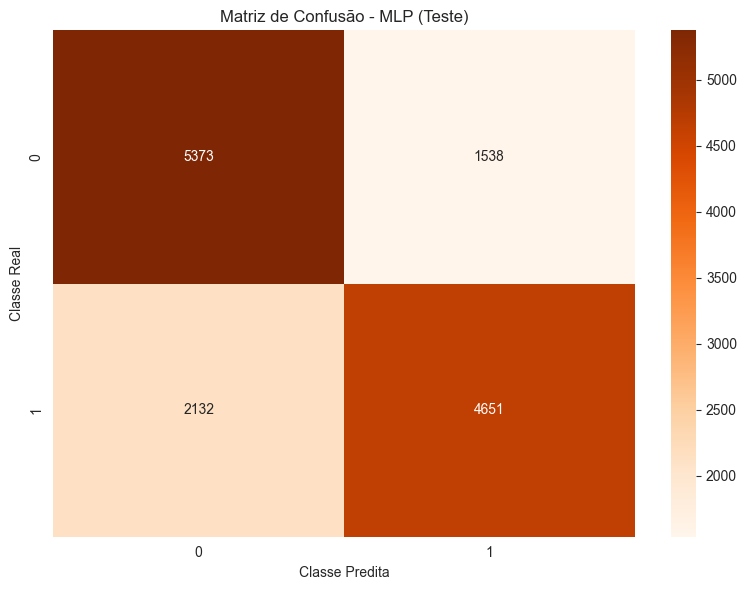


Validação Cruzada em TODOS os dados (X e y) [apenas exploratória]:
• Acurácias em cada fold: [0.50467358 0.50467358 0.50467358 0.50471044 0.50463741]
• Acurácia Média (X completo): 0.5047

Curva de Aprendizado (Loss por época):


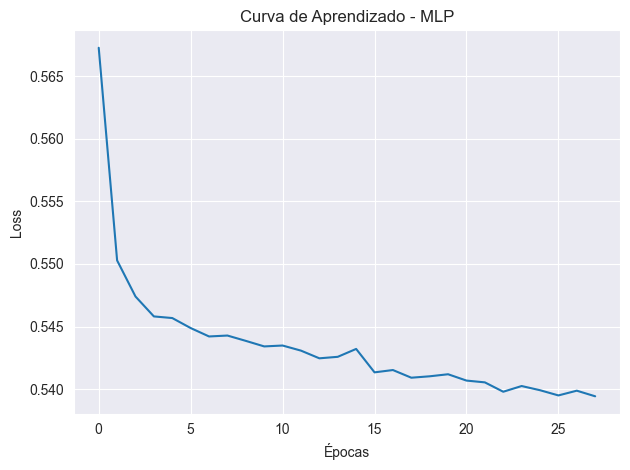


Validação Cruzada (cv=5) no CONJUNTO DE TESTE (20%):
• Acurácias em cada fold (teste): [0.72289157 0.73493976 0.73128879 0.71997079 0.72717312]
• Acurácia Média (teste): 0.7273


In [5]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# === Avaliação Final do Melhor Modelo (MLP do GridSearch) ===
print("\nAvaliação Final - MLP (Melhor Modelo do GridSearch)\n")

# 1. Obter o melhor estimador
best_mlp = grid.best_estimator_

# 2. Previsões no conjunto de teste (20%)
y_pred_mlp = best_mlp.predict(X_test)

# 3. Relatório de Classificação
print("Classification Report (conjunto de teste):")
print(classification_report(y_test, y_pred_mlp))

# 4. Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_mlp)
print("\nMatriz de Confusão:")
print(cm)

# 5. Métricas globais
acc = accuracy_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp, average='macro')
print("\nMétricas Globais:")
print(f"• Acurácia : {acc:.4f}")
print(f"• F1-Score : {f1:.4f}")

# 6. Heatmap da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Matriz de Confusão - MLP (Teste)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.tight_layout()
plt.show()

# 7. Validação Cruzada no conjunto COMPLETO (não recomendada para avaliação final)
print("\nValidação Cruzada em TODOS os dados (X e y) [apenas exploratória]:")
cv_scores_all = cross_val_score(best_mlp, X, y, cv=5, scoring='accuracy')
print("• Acurácias em cada fold:", cv_scores_all)
print(f"• Acurácia Média (X completo): {cv_scores_all.mean():.4f}")

# 8. Curva de aprendizado (se disponível)
if hasattr(best_mlp, "loss_curve_"):
    print("\nCurva de Aprendizado (Loss por época):")
    plt.figure()
    plt.plot(best_mlp.loss_curve_)
    plt.title("Curva de Aprendizado - MLP")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Modelo não possui atributo 'loss_curve_'.")

# 9. Validação Cruzada nos 20% de TESTE
print("\nValidação Cruzada (cv=5) no CONJUNTO DE TESTE (20%):")
cv_scores_test = cross_val_score(best_mlp, X_test, y_test, cv=5, scoring='accuracy')
print("• Acurácias em cada fold (teste):", cv_scores_test)
print(f"• Acurácia Média (teste): {cv_scores_test.mean():.4f}")

# # Gráfico de Acurácia por Época
# plt.figure()
# plt.plot(historico_acuracia)
# plt.xlabel("Época")
# plt.ylabel("Acurácia")
# plt.title("Acurácia por época")
# plt.grid(True)
# plt.savefig("grafico_acuracia_mlp.png")
# plt.show()
#
# # Gráfico 3D da Perda por Batch e Época
# fig = plt.figure()
# ax = fig.add_subplot(111, projection="3d")
#
# max_batches = max(len(l) for l in matriz_perda_batches)
# X, Y = np.meshgrid(
#     np.arange(len(matriz_perda_batches)),
#     np.arange(max_batches),
# )
# Z = np.zeros_like(X, dtype=float)
#
# for e, losses in enumerate(matriz_perda_batches):
#     Z[: len(losses), e] = losses
#
# ax.plot_surface(X, Y, Z, cmap="viridis")
# ax.set_xlabel("Época")
# ax.set_ylabel("Batch")
# ax.set_zlabel("Loss")
# ax.set_title("Loss por batch ao longo das épocas")
# plt.savefig("grafico_mapa3d_mlp.png")
# plt.show()

---

## Avaliação Final do Modelo MLP — Base de Teste (20%)

### Classification Report
O relatório de classificação do MLP inclui:
- **Precisão** (Precision): proporção de previsões positivas corretas.
- **Recall**: cobertura dos positivos reais.
- **F1-Score**: média harmônica entre precisão e recall.
- Resultados detalhados para cada classe.

### Matriz de Confusão
A matriz de confusão mostra:
- Quantos exemplos de cada classe foram corretamente classificados (**verdadeiros positivos/negativos**) e onde ocorreram erros (**falsos positivos/negativos**).
- Visualização em formato de heatmap para facilitar a análise.

### Métricas Globais
- **Acurácia**: proporção total de acertos do modelo no conjunto de teste.
- **F1-Score Macro**: média do F1 das classes, útil para cenários com desbalanceamento.

### Curva de Aprendizado
- Apresenta a evolução da função de perda (**loss**) ao longo das épocas de treinamento.
- Ajuda a identificar se o modelo está convergindo bem, ou se existe risco de overfitting ou underfitting.

### Validação Cruzada
- **Em todo o dataset (X, y):** Usada apenas para análise exploratória, pois mistura dados de treino e teste (pode inflar o resultado).
- **No conjunto de teste (20%):** Avalia a estabilidade do desempenho do modelo nos dados nunca vistos, dividindo o teste em 5 folds.

---

**Conclusão:**
Esta avaliação detalha o desempenho final do MLP em dados não vistos, mostrando métricas essenciais, acertos/erros, estabilidade e o comportamento do aprendizado da rede ao longo das épocas. Isso garante uma visão clara sobre a capacidade do modelo para generalizar e ser aplicado na prática.

---